In [1]:
pip install pandas numpy matplotlib seaborn openai wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Display basic info
print(df.info())

# Show first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [9]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (if necessary)
df.fillna({'review_title': 'No Review', 'review_content': 'No Review'}, inplace=True)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


/var/folders/hk/g4pffvkx4_dchbdbc5qkn8vm0000gn/T/ipykernel_41039/949852101.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")


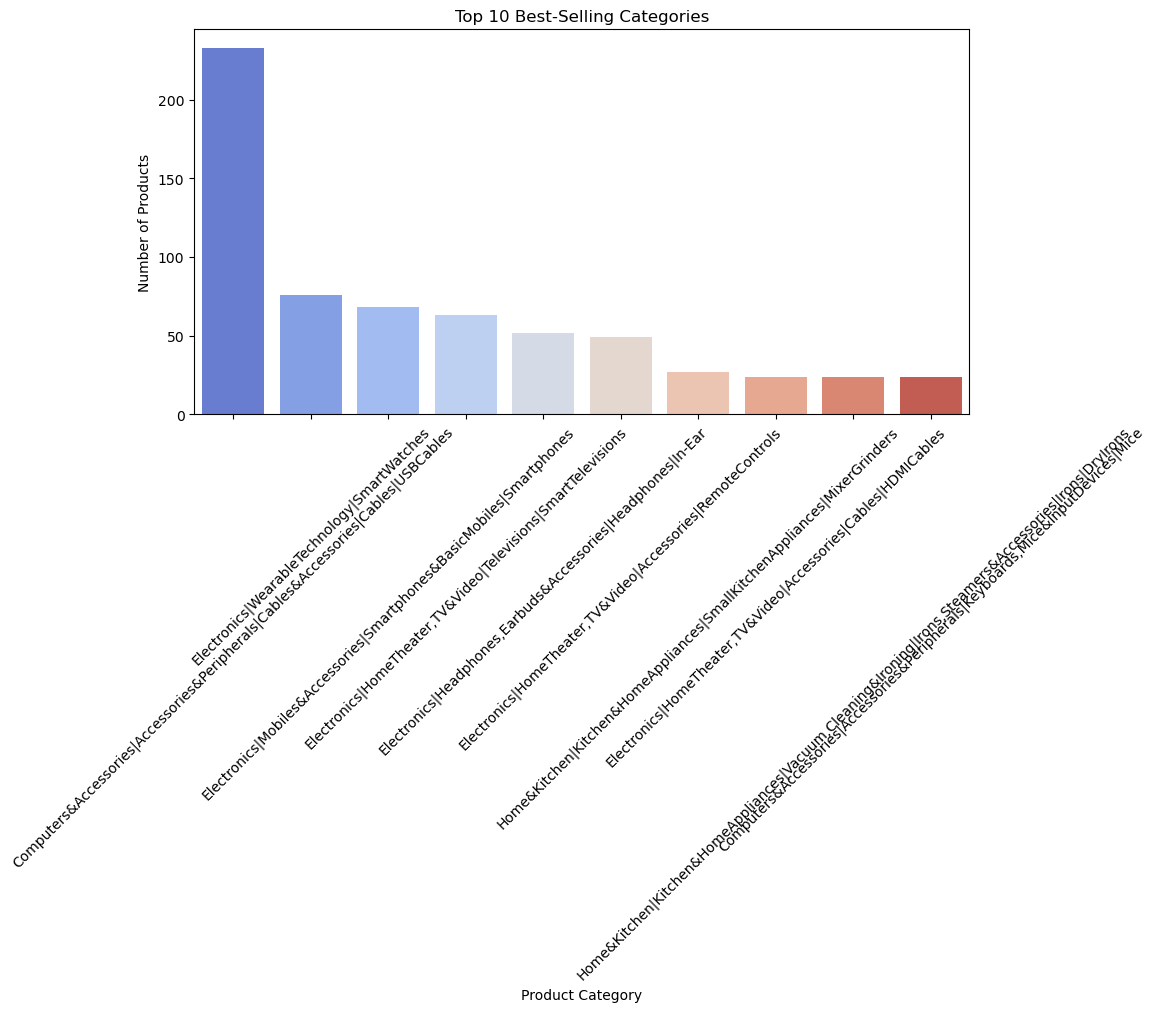

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of products per category
top_categories = df['category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.title("Top 10 Best-Selling Categories")
plt.xticks(rotation=45)
plt.show()


In [17]:
# Remove ₹ symbol and commas, then convert to float
df["discounted_price"] = df["discounted_price"].replace('[₹,]', '', regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace('[₹,]', '', regex=True).astype(float)

# Calculate average price and discount per category
price_analysis = df.groupby("category")[["actual_price", "discounted_price"]].mean().sort_values(by="actual_price", ascending=False)

print(price_analysis.head(10))


                                                    actual_price  \
category                                                           
Home&Kitchen|Heating,Cooling&AirQuality|AirCond...  75990.000000   
Computers&Accessories|Laptops|TraditionalLaptops    59890.000000   
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Clea...  44949.500000   
Electronics|HomeTheater,TV&Video|Televisions|Sm...  40132.841270   
Computers&Accessories|Tablets                       37999.000000   
Computers&Accessories|ExternalDevices&DataStora...  32000.000000   
Home&Kitchen|Heating,Cooling&AirQuality|AirPuri...  27113.250000   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...  23999.000000   
Electronics|Mobiles&Accessories|Smartphones&Bas...  20593.397059   
Electronics|HomeTheater,TV&Video|Projectors         18293.333333   

                                                    discounted_price  
category                                                              
Home&Kitchen|Heating,Cooling&AirQuality|A

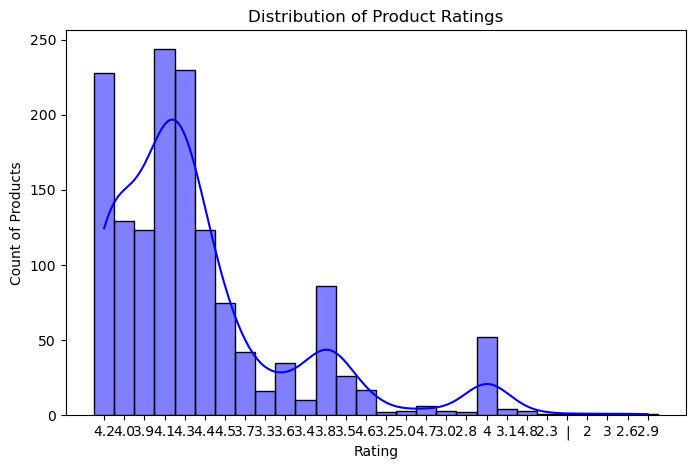

In [19]:
# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'].dropna(), bins=10, kde=True, color='blue')
plt.xlabel("Rating")
plt.ylabel("Count of Products")
plt.title("Distribution of Product Ratings")
plt.show()


In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment(review):
    return sia.polarity_scores(str(review))['compound']

df["sentiment_score"] = df["review_content"].apply(get_sentiment)

# Label sentiments
df["sentiment_label"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Show sentiment distribution
print(df["sentiment_label"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neetimishra/nltk_data...


sentiment_label
Positive    1380
Negative      74
Neutral       11
Name: count, dtype: int64


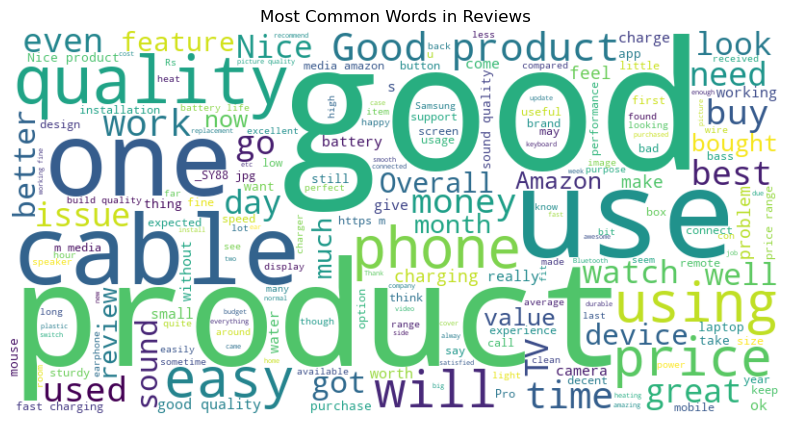

In [23]:
from wordcloud import WordCloud

# Combine all reviews
text = " ".join(str(review) for review in df["review_content"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


In [37]:
!pip install --upgrade openai




python(42414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
import requests

# Set Hugging Face API Key
HUGGINGFACE_API_KEY = "TypeYourHuggingFaceAPIKeyHere"  # Replace with your actual Hugging Face API key"


# Function to generate AI insights using Hugging Face
def generate_ai_insights(text):
    prompt = f"Analyze the following Amazon sales and review data and generate insights:\n{text}"

    # Define API endpoint and headers
    API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"  # Example model for summarization
    headers = {"Authorization": f"Bearer {HUGGINGFACE_API_KEY}"}

    # Send request
    response = requests.post(API_URL, headers=headers, json={"inputs": prompt})

    # Handle response
    if response.status_code == 200:
        return response.json()[0]["summary_text"]
    else:
        return f"Error: {response.json()}"

# Prepare summary
summary = f"Top categories: {top_categories.to_string()}\nSentiment Analysis:\n{df['sentiment_label'].value_counts().to_string()}"

# Get AI-generated insights
ai_insights = generate_ai_insights(summary)
print("AI-Generated Insights:\n", ai_insights)


AI-Generated Insights:
 Analyze the following Amazon sales and review data and generate insights. Analyze the top categories: category                Computers&Accessories|Accessories&Peripherals; category                Cables&Accessory|Cables|USBCables; category    WearableTechnology|SmartWatches; category   Smartphones; category    SmartTelevisions. Analyzing the sales data will generate insights into the sales of Amazon products.


In [49]:
# Write everything to the file
with open("Amazon_Insights_Report.txt", "w") as file:
    file.write("Amazon Sales Insights\n")
    file.write("="*30 + "\n")
    file.write(f"Top Categories:\n{top_categories.to_string()}\n\n")
    file.write(f"Sentiment Analysis:\n{df['sentiment_label'].value_counts().to_string()}\n\n")
    file.write("AI-Generated Insights:\n")
    file.write(ai_insights)